In [1]:
# Importamos todo lo necesario
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
# pip install -U scikit-learn

In [3]:
df = pd.read_csv('insurance.csv')
df.head()
#Nuestro target será la prima del seguro (charges)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Exploramos un poco el dataframe
df.info()
#numéricas tenemos age, bmi, children i charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Cuántos valores únicos tenemos de cada columna??
df.nunique()
#sex i smoker podemos convertirla en variables binarias

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
#Estadísticos
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

1

In [8]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [9]:
#Volvemos a comprobar: hay duplicados? (todas las columnas iguales)
df.duplicated().sum()

0

# Preprocesado

In [10]:
#Preproceasado
#Numéricas: age, bmi, children >> son normales?

from scipy import stats
from scipy.stats import shapiro

# H0: la variables es normal
# H1: La variable no es normal

# si p-value > 0.05 se acepta la hipotesis nula HO


In [11]:
stats, p= stats.shapiro(df.age)
print(stats, p)
# devuelve la "fuerza" del descarte o aceptación  y el p-value

0.9448564052581787 6.211415541934325e-22


In [12]:
# El 0.9448 es la fuerza del descarte o aceptación de la hipótesis nula. En el caso de age, se decarta la H0 
# (el p-value) es muchísmo menor que 0.05 (fijemos que es un número e-22)y la fuerza el descarte es 0.99

In [13]:
#hay que hacer este import aquí (no entendemos porqué no funciona solo con el anterior)
from scipy.stats import shapiro

normal = []
no_normal = []
for name in ['age', 'bmi','children']:
    stats, p=shapiro(df[name])
    if p > 0.05:
        print(name, "es normal", stats, p)
        normal.append(name)
    else:
         print(name, "no es normal", stats, p)
         no_normal.append(name)
print("Normales:", normal)
print("No Normales", no_normal)

age no es normal 0.9448564052581787 6.211415541934325e-22
bmi no es normal 0.9938761591911316 2.5783332603168674e-05
children no es normal 0.8233991861343384 5.4062968267062164e-36
Normales: []
No Normales ['age', 'bmi', 'children']


<Axes: >

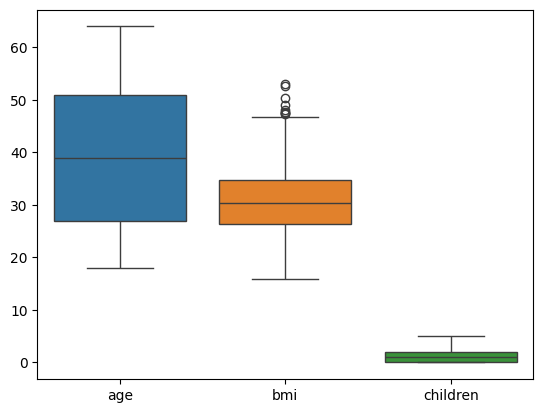

In [14]:
# Ninguna es nomral
# Si hubiera alguna Normal aplicamos StandardScaler() >> no es nuestro caso
# Aplicamos normalización a las No Normales
# Primero, chequear outliers con los boxplots
sns.boxplot(data=df[no_normal])


In [15]:
# bmi CON OUTLIERS >> aplicamos RobustScaler
# SIN OUTLIERS >> aplicamos MinMaxScaler
# Hacemos copia del dataset original dt_t : dataset transformado
df_t = df.copy()

In [16]:
# Importamos
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [17]:
rs = RobustScaler()
mms = MinMaxScaler()

In [18]:
df_t [['bmi']] = rs.fit_transform(df_t[['bmi']]) # para pasar 2 dimensiones doble []
df_t

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.297265,0,yes,southwest,16884.92400
1,18,male,0.400713,1,no,southeast,1725.55230
2,28,male,0.309156,3,no,southeast,4449.46200
3,33,male,-0.914982,0,no,northwest,21984.47061
4,32,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,0.067776,3,no,northwest,10600.54830
1334,18,female,0.180737,0,no,northeast,2205.98080
1335,18,female,0.766944,0,no,southeast,1629.83350
1336,21,female,-0.546968,0,no,southwest,2007.94500


In [19]:
df_t [['age']] = mms.fit_transform(df_t[['age']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0,yes,southwest,16884.92400
1,0.000000,male,0.400713,1,no,southeast,1725.55230
2,0.217391,male,0.309156,3,no,southeast,4449.46200
3,0.326087,male,-0.914982,0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,3,no,northwest,10600.54830
1334,0.000000,female,0.180737,0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0,no,southwest,2007.94500


In [20]:
df_t [['children']] = mms.fit_transform(df_t[['children']])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.067776,0.6,no,northwest,10600.54830
1334,0.000000,female,0.180737,0.0,no,northeast,2205.98080
1335,0.000000,female,0.766944,0.0,no,southeast,1629.83350
1336,0.065217,female,-0.546968,0.0,no,southwest,2007.94500


In [21]:
#################################################
#################  8a sessió ####################
#################################################

In [22]:
df_t.head()


,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,-0.297265,0.0,yes,southwest,16884.92400
1,0.000000,male,0.400713,0.2,no,southeast,1725.55230
2,0.217391,male,0.309156,0.6,no,southeast,4449.46200
3,0.326087,male,-0.914982,0.0,no,northwest,21984.47061
4,0.304348,male,-0.180737,0.0,no,northwest,3866.85520


In [23]:
# Ahora nos faltan las categóricas >> onehotencoder, labelencoder, dummies, binarizer, etc

In [24]:
# Region tiene 4 valores >> podemos hacer labelencoder y pasará a ser 0, 1, 2, 3
df_t.region.unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
#Primero vemos como funciona dummies
dummies = ['sex']
pd.get_dummies(df_t[dummies], prefix='sex', drop_first=False).astype(int)
# df_t['sex'] = pd.get_dummies(data=df_t, columns='sex', prefix='sex')

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [26]:
pd.get_dummies(df_t[dummies], prefix='sex', drop_first=True) # con True para eliminar multicolinealidad; así evitamos sobrerepresentación de variables
# que nos explican lo mismo

,sex_male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [27]:
#Si lo hacemos con region
pd.get_dummies(df_t[['region']], prefix='sex', drop_first=False).astype(int)

,sex_northeast,sex_northwest,sex_southeast,sex_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [28]:
dummies = ['sex','smoker']
df_t [dummies]= pd.get_dummies(df_t[dummies], drop_first=True).astype(int)

In [29]:
# Importamos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_t['region'] = le.fit_transform(df_t['region'])
df_t

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,-0.297265,0.0,1,3,16884.92400
1,0.000000,1,0.400713,0.2,0,2,1725.55230
2,0.217391,1,0.309156,0.6,0,2,4449.46200
3,0.326087,1,-0.914982,0.0,0,1,21984.47061
4,0.304348,1,-0.180737,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,1,0.067776,0.6,0,1,10600.54830
1334,0.000000,0,0.180737,0.0,0,0,2205.98080
1335,0.000000,0,0.766944,0.0,0,2,1629.83350
1336,0.065217,0,-0.546968,0.0,0,3,2007.94500


<Axes: >

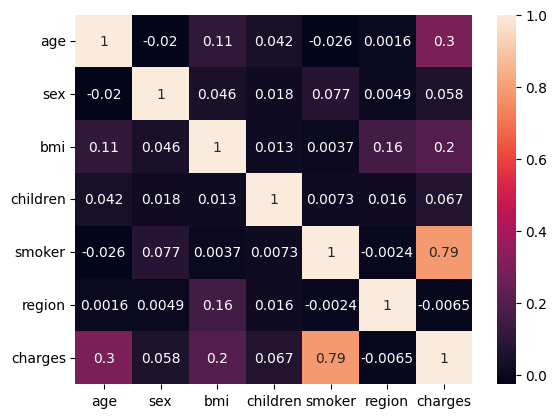

In [30]:
# REVISAR PORQUÉ NO SALE
corr = df_t.corr()
sns.heatmap(corr, annot=True)

# Modelos

In [31]:
#Importamos + entrenamos + predecimos
#REGRESIÓN
# Importamos los lineal models (regresión lineal, Lasso, Ridge)
from sklearn.linear_model import LinearRegression, Lasso, Ridge
# Regresión polinómica
from sklearn.preprocessing import PolynomialFeatures
# Árbol de decisión
from sklearn.tree import DecisionTreeRegressor
#Bosques aleatorios
from sklearn.ensemble import RandomForestRegressor
# Vecinos más cercanos
from sklearn.neighbors import KNeighborsRegressor
# Máquinas de Vectores de Soporte
from sklearn.svm import SVR
# Redes Neuronales
from sklearn.neural_network import MLPRegressor


In [32]:
#Entrenamos
# Train test 80/20
#importamos para poder dividir la muestra
from sklearn.model_selection import train_test_split
#
X = df_t.drop('charges', axis=1)
y = df_t['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [33]:
X_train.shape

(1069, 6)

In [34]:
X_test.shape

(268, 6)

In [35]:
#Aplicamos el modelo 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
#Otro
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# Haremos un bucle mejor para ejecutar todos a la vez
models = {
    'Regresor Lineal': LinearRegression(),
    'Polinomial' : None, #es diferente a los demás
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Arbol' : DecisionTreeRegressor(),
    'Random' : RandomForestRegressor(),
    'KNN' : KNeighborsRegressor(),
    'Vectores' : SVR(),
    'Redes' : MLPRegressor()
}
for name, model in models.items(): # para iterar sobre las claves y los valores ponemos items
    if name == 'Polinomial':
        pf = PolynomialFeatures(degree = 2)
        X_train_p = pf.fit_transform(X_train)
        pr = LinearRegression() #model
        pr.fit(X_train_p, y_train)
        X_test_p = pf.transform(X_test)
        y_pred = pr.predict(X_test_p)
    else: 
        #Resto de modelos
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)



c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
models

{'Regresor Lineal': LinearRegression(),
 'Polinomial': None,
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'Arbol': DecisionTreeRegressor(),
 'Random': RandomForestRegressor(),
 'KNN': KNeighborsRegressor(),
 'Vectores': SVR(),
 'Redes': MLPRegressor()}

In [48]:
data_y = {} # guardaremos predicciones de cada modelo en un diccionario para que luego sea más fácil crear un Dataframe


for name, model in models.items(): # para iterar sobre las claves y los valores ponemos items
    if name == 'Polinomial':
        pf = PolynomialFeatures(degree = 2)
        X_train_p = pf.fit_transform(X_train)
        pr = LinearRegression() #model
        pr.fit(X_train_p, y_train)
        X_test_p = pf.transform(X_test)
        y_pred = pr.predict(X_test_p)
    else: 
        #Resto de modelos
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
    #almaceno en el diccionario
    data_y[name] = y_pred
data_y # Nos muestra las predicciones

c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Regresor Lineal': array([ 3681.12965145, 14497.64751108,  1319.78488819,   246.38040846,
        12168.34475839, 12397.29245568, 12616.4167685 , 13055.57556447,
        31998.89762074, 11295.32900787,  9691.01614796, 30809.14637667,
         4146.20023342, 11404.22200868, 28685.47262429, 27466.4051604 ,
        11429.75894972,  3924.35799899, -1900.09436386,  7193.90722722,
        25040.70096632,  5611.16305813,  8964.49110604,  1585.28960697,
         1888.10498116, 28088.00883699,  5792.99116577, 36229.59355159,
         6560.30636816, 16003.78019607,  8524.84642404, 27355.91105948,
        16552.70717407, 39558.1289674 , 12319.70390385,  2627.82875996,
         4292.20327815,  6868.90537422, 37112.27851686,  3679.28281548,
         5118.51908634, 28437.31635119,  7770.25520317, 30993.75356834,
        11452.94168344,  5310.99239519,  5620.77479816, 15923.66073262,
        13006.48104474, 23333.28997228, 32936.1880349 ,  5936.09896016,
         7845.1022629 , 11757.21249855,  8884

In [49]:
# añadimos el y_test a las predicciones
data_y['y_test'] = y_test

<Axes: >

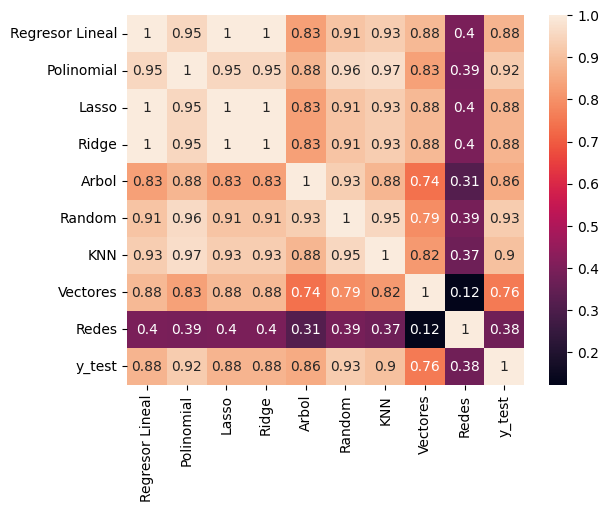

In [50]:
# Vemos cómo correlacionan los datos reales con las predicciones
df_y = pd.DataFrame(data_y)
corr_y = df_y.corr()
sns.heatmap(corr_y, annot=True)

<Axes: ylabel='Density'>

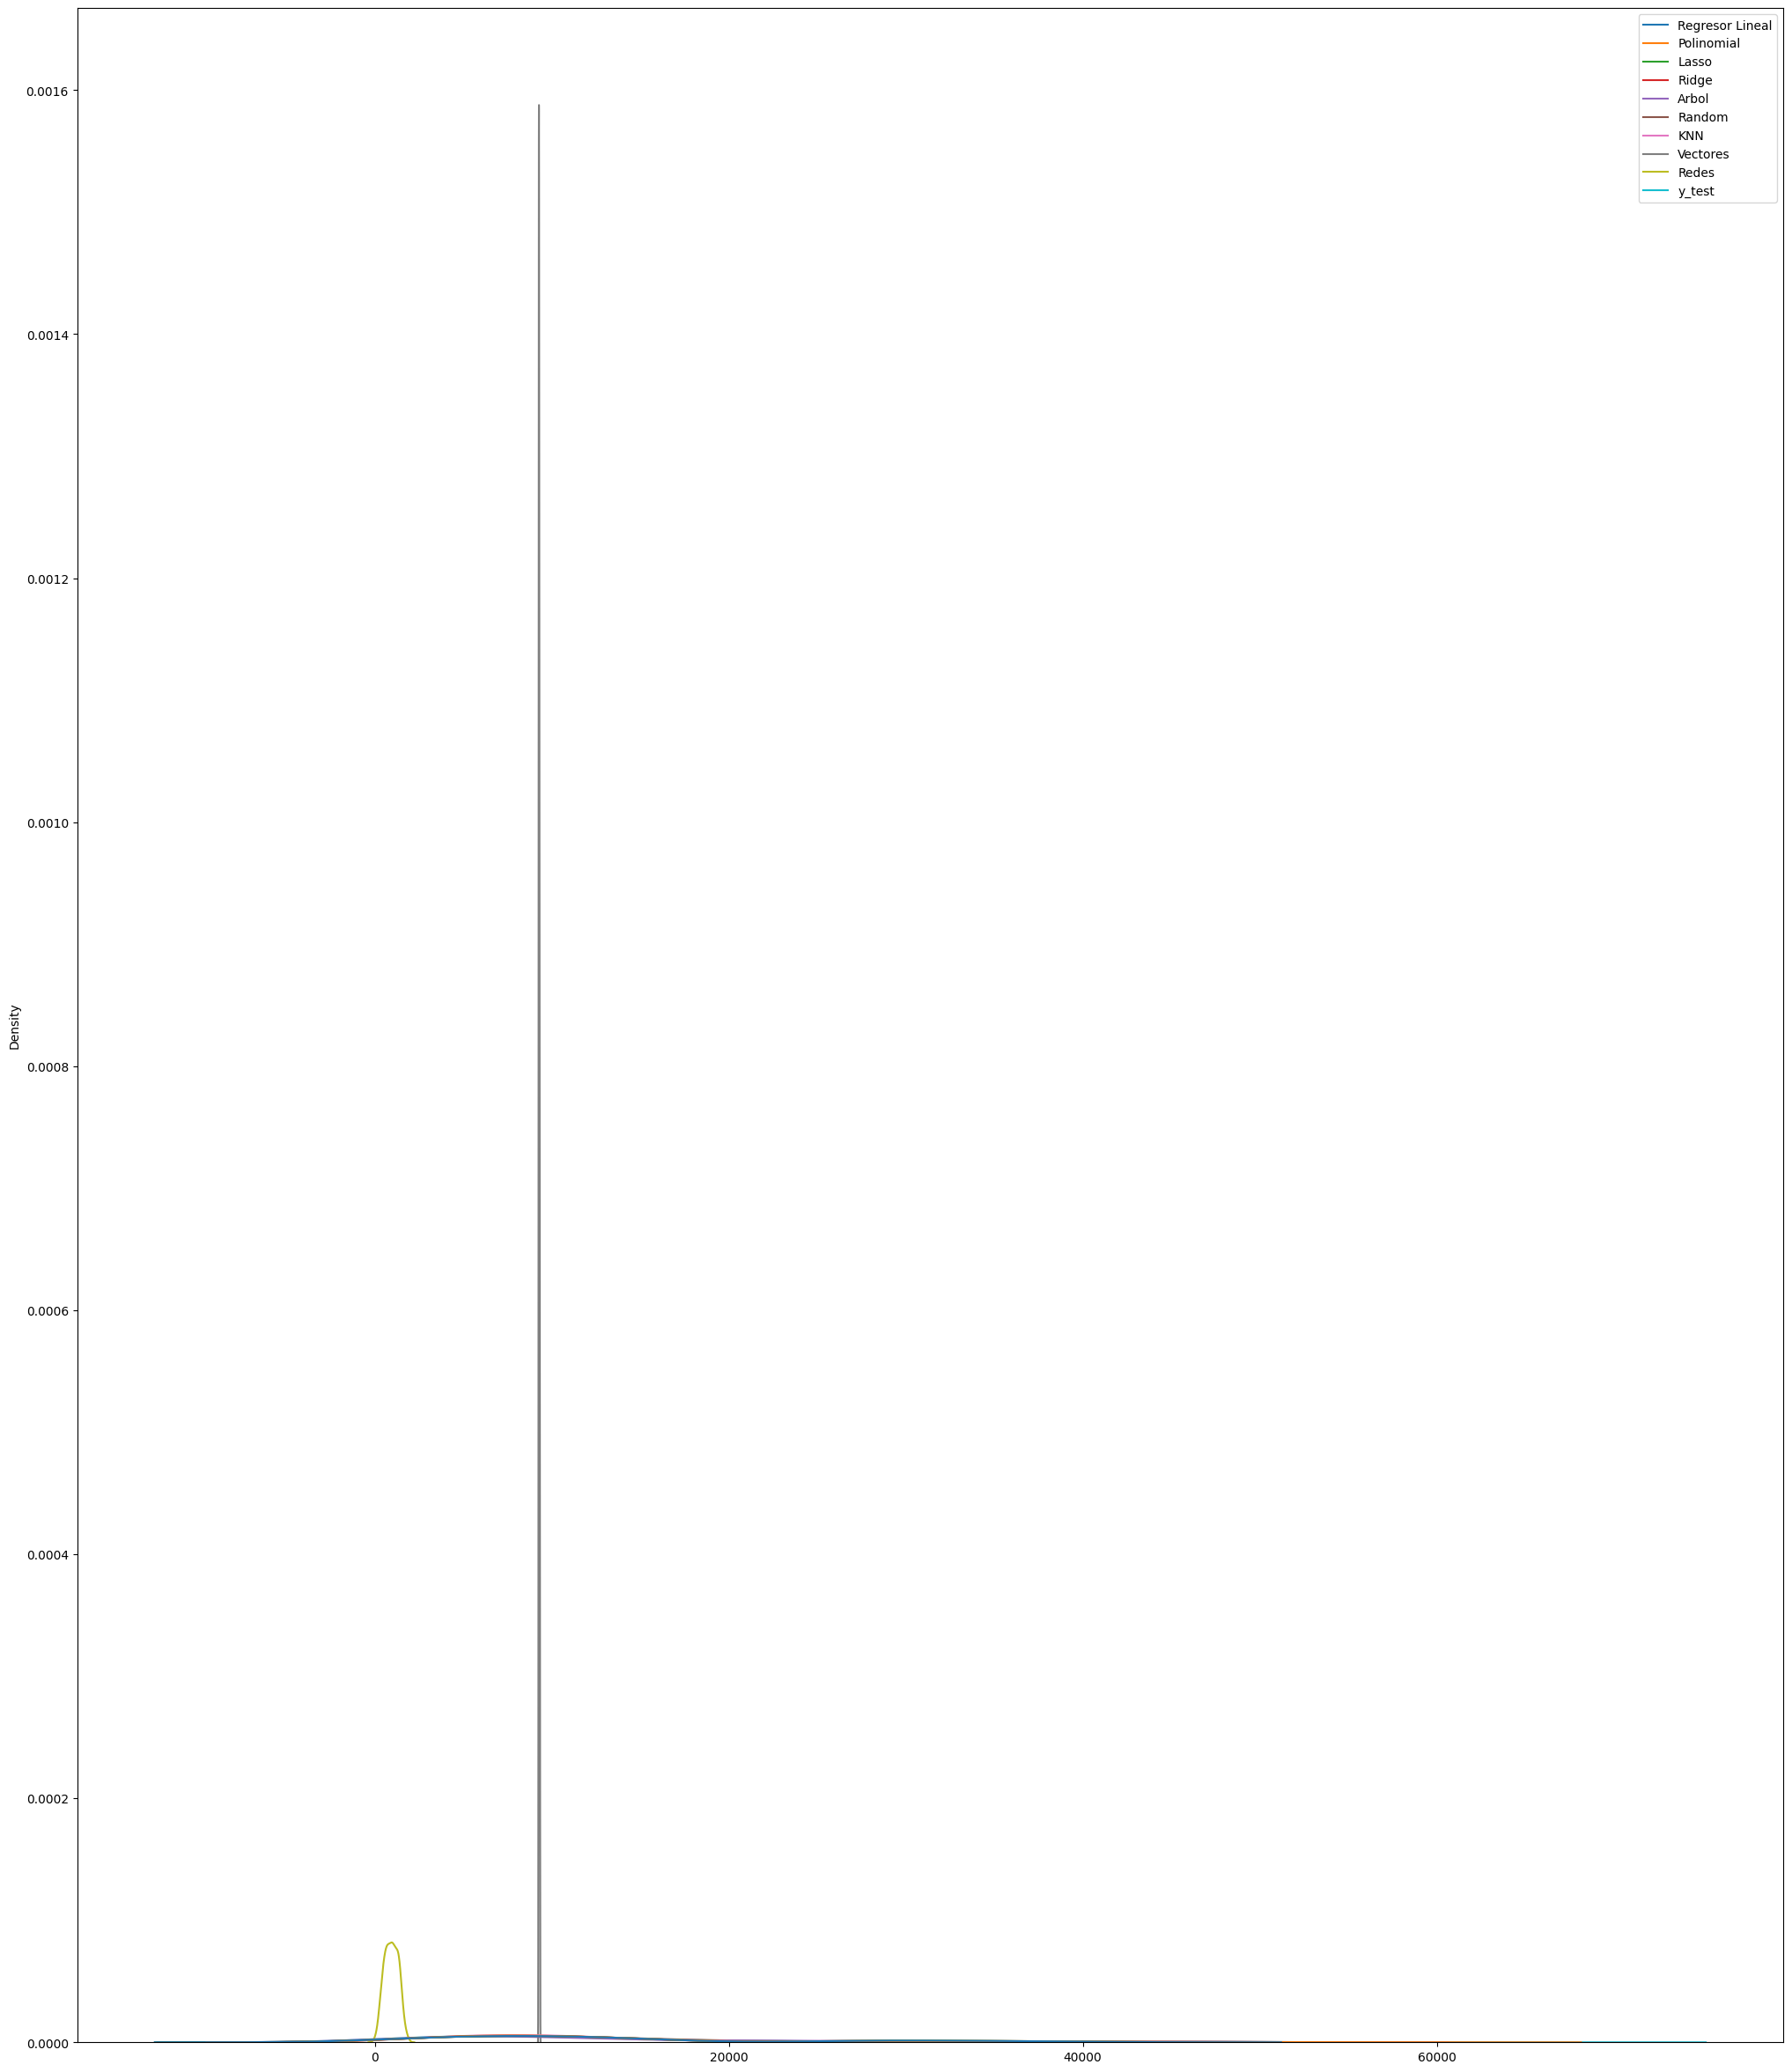

In [53]:
# línea de densidad
plt.figure(figsize=(25,30))
sns.kdeplot(df_y)

<Axes: ylabel='Density'>

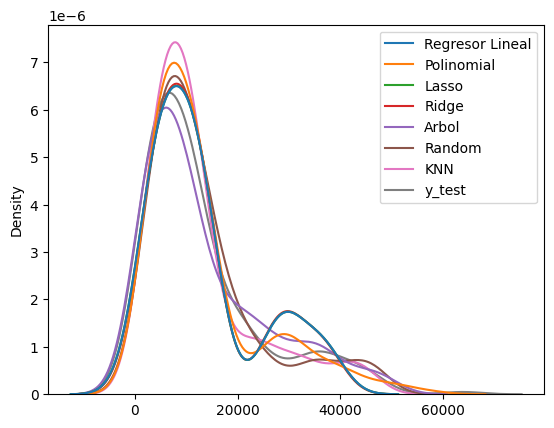

In [54]:
# Para mejorar la visualización eliminamos Redes y Vectores
sns.kdeplot(df_y[['Regresor Lineal', 'Polinomial','Lasso','Ridge','Arbol','Random','KNN','y_test']])

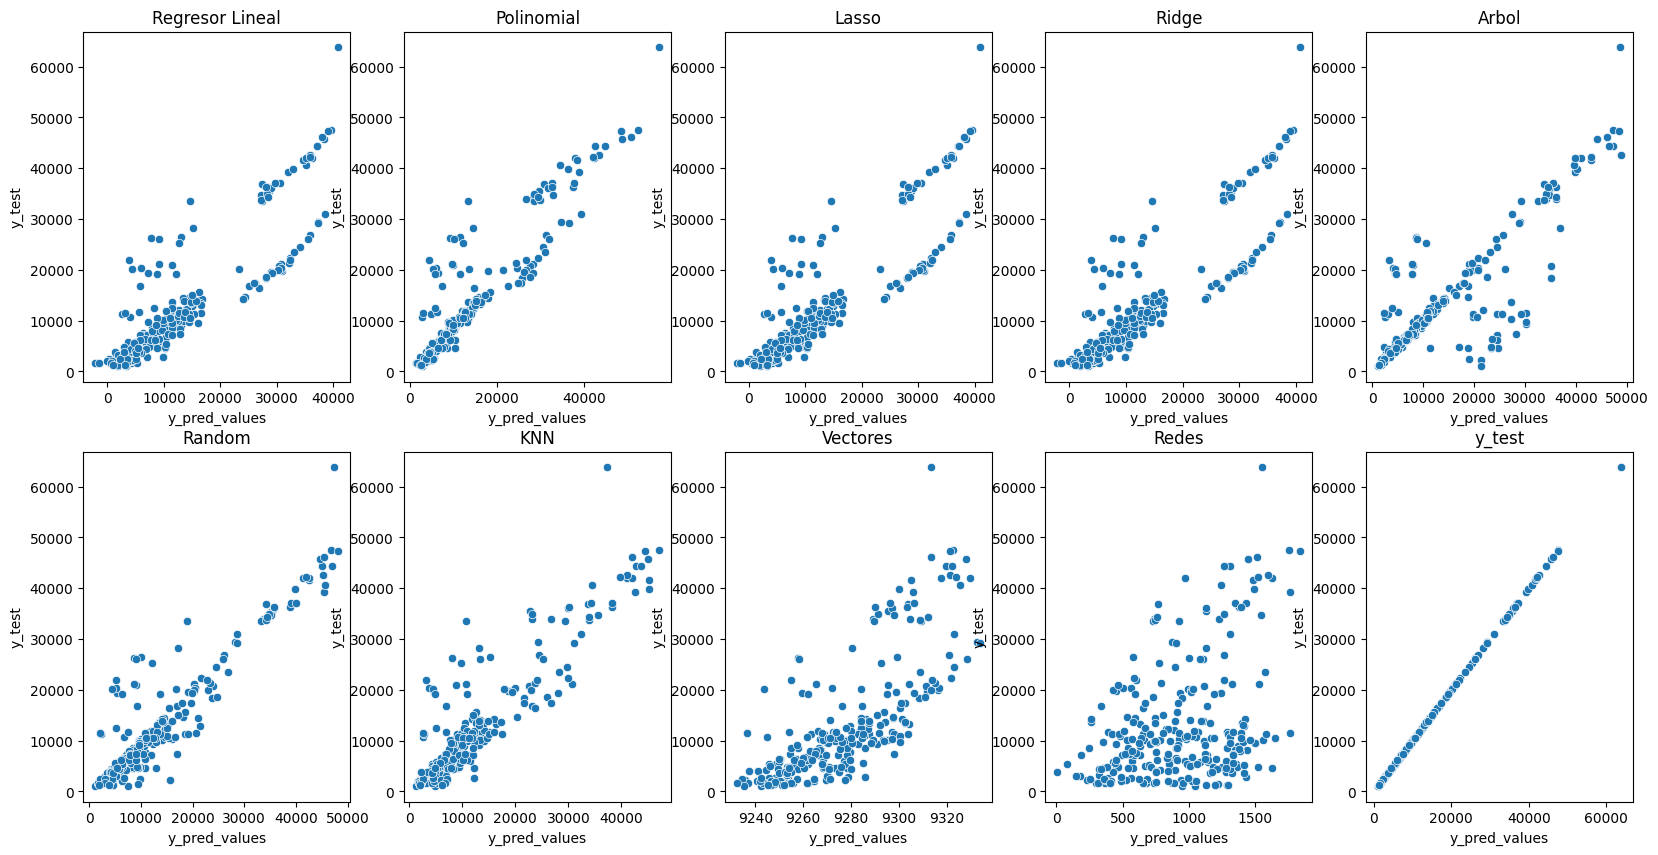

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
ax = axes.flatten() #aplanamos (1 sola dimensión el eje)

for i, (name, y_values) in enumerate(data_y.items()):
    sns.scatterplot(y = y_test, x = y_values, ax=ax[i])
    ax[i].set_title(f'{name}')
    ax[i].set_xlabel('y_pred_values')
    ax[i].set_ylabel('y_test')

### Próximo día: A partir del cálculo MSE (error cuadrático medio) i R^2 >>sirven para evaluar la calidad de los modelos.

In [ ]:
#################################################
#################  9a sessió ####################
#################################################

In [56]:
# Redes y Vectores no deberán dar errores cuadrático medios elevados; el resto de modelos, dará valores parecidos. 
# R^2 cercanos a cero, no será buen modelo; cercano a 1, buen modelo
# Vamos a calculararlos
from sklearn.metrics import mean_squared_error
#
metrics = []
for col in models:
    metrics.append({
        'Modelo': col,
        'MSE':mean_squared_error(y_test, df_y[col])
    })
metrics


[{'Modelo': 'Regresor Lineal', 'MSE': 31708436.90500204},
 {'Modelo': 'Polinomial', 'MSE': 19832338.521817554},
 {'Modelo': 'Lasso', 'MSE': 31706079.06367961},
 {'Modelo': 'Ridge', 'MSE': 31666941.492905505},
 {'Modelo': 'Arbol', 'MSE': 40935432.05827152},
 {'Modelo': 'Random', 'MSE': 19362307.009577557},
 {'Modelo': 'KNN', 'MSE': 25295321.83413033},
 {'Modelo': 'Vectores', 'MSE': 148948530.86518997},
 {'Modelo': 'Redes', 'MSE': 278023189.41123885}]

In [59]:
#Lo convertimos a Pandas para verlo mejor
df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MSE
0,Regresor Lineal,3.170844e+07
1,Polinomial,1.983234e+07
2,Lasso,3.170608e+07
3,Ridge,3.166694e+07
4,Arbol,4.093543e+07
5,Random,1.936231e+07
6,KNN,2.529532e+07
7,Vectores,1.489485e+08
8,Redes,2.780232e+08


In [62]:
#Ahora lo hacemos con el r^2
from sklearn.metrics import mean_squared_error, r2_score
metrics = []
for col in models:
    metrics.append({
        'Modelo': col,
        'MSE':mean_squared_error(y_test, df_y[col]),
        'R^2': r2_score(y_test, df_y[col])
    })
metrics

[{'Modelo': 'Regresor Lineal',
  'MSE': 31708436.90500204,
  'R^2': 0.7660219420545369},
 {'Modelo': 'Polinomial',
  'MSE': 19832338.521817554,
  'R^2': 0.8536562345928869},
 {'Modelo': 'Lasso', 'MSE': 31706079.06367961, 'R^2': 0.7660393406773456},
 {'Modelo': 'Ridge', 'MSE': 31666941.492905505, 'R^2': 0.766328138666028},
 {'Modelo': 'Arbol', 'MSE': 40935432.05827152, 'R^2': 0.6979355077373149},
 {'Modelo': 'Random', 'MSE': 19362307.009577557, 'R^2': 0.8571246193870213},
 {'Modelo': 'KNN', 'MSE': 25295321.83413033, 'R^2': 0.8133446219507078},
 {'Modelo': 'Vectores', 'MSE': 148948530.86518997, 'R^2': -0.0990982649217027},
 {'Modelo': 'Redes', 'MSE': 278023189.41123885, 'R^2': -1.0515462845783925}]

In [63]:
#Lo convertimos a Pandas para verlo mejor
df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MSE,R^2
0,Regresor Lineal,3.170844e+07,0.766022
1,Polinomial,1.983234e+07,0.853656
2,Lasso,3.170608e+07,0.766039
3,Ridge,3.166694e+07,0.766328
4,Arbol,4.093543e+07,0.697936
5,Random,1.936231e+07,0.857125
6,KNN,2.529532e+07,0.813345
7,Vectores,1.489485e+08,-0.099098
8,Redes,2.780232e+08,-1.051546


[Text(0.6517256994924042, 0.9761904761904762, 'smoker <= 0.5\nsquared_error = 149291940.593\nsamples = 1069\nvalue = 13349.889'),
 Text(0.40466089660668725, 0.9285714285714286, 'age <= 0.533\nsquared_error = 36869808.398\nsamples = 851\nvalue = 8489.163'),
 Text(0.19862458255146404, 0.8809523809523809, 'children <= 0.1\nsquared_error = 23402711.701\nsamples = 478\nvalue = 5469.114'),
 Text(0.08677665477606025, 0.8333333333333334, 'age <= 0.098\nsquared_error = 17114480.573\nsamples = 197\nvalue = 3863.134'),
 Text(0.03811187078874356, 0.7857142857142857, 'bmi <= -0.158\nsquared_error = 14335322.11\nsamples = 90\nvalue = 2750.547'),
 Text(0.019718588981371382, 0.7380952380952381, 'age <= 0.033\nsquared_error = 142845.829\nsamples = 39\nvalue = 1855.483'),
 Text(0.012088783194609591, 0.6904761904761905, 'sex <= 0.5\nsquared_error = 87272.579\nsamples = 24\nvalue = 1663.278'),
 Text(0.005152596115735236, 0.6428571428571429, 'region <= 1.5\nsquared_error = 62220.983\nsamples = 9\nvalue = 1

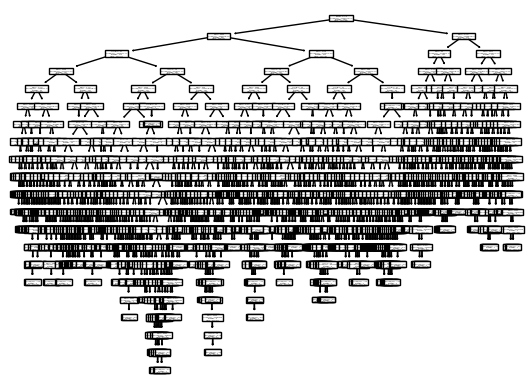

In [66]:
#El Random forest tiene menor error (MSE) y mayor ajuste (R^2 más cercano a 1)

# Para ver el árbol
from sklearn.tree import DecisionTreeRegressor,plot_tree
arbol = DecisionTreeRegressor()
arbol.fit(X_train, y_train)
plot_tree(arbol, feature_names=X_train.columns)

In [ ]:
#Se puede limitar las ramas y niveles del árbol para que se vea mejor.

## Tunear los hiperparámetros (ajustar los modelos)

In [67]:
# Vamos hace el Random y ...
# Primero tendremos que saber qué parámetros tiene cada modelo
lr = LinearRegression()
rf = RandomForestRegressor()
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)


RandomForestRegressor()

In [70]:
# Para saber qué parámetros utilizó
lr.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [71]:
# Random Forest tiene muchos más parámetros
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
#Importamos las librerías que nos permite "jugar" con las posibles combinaciones de parámetros

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [74]:
# Creamos un diccionario con los posibles valores de los parámetros de Lineal Regression
lr_param = {'copy_X': [True, False], 
            'fit_intercept': [True, False], 
            'n_jobs': [None,1,2],
            'positive': [True, False]}
#Aplicamos la técnica de ajuste de parámetros
lr_grid = GridSearchCV(LinearRegression(), lr_param)
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, 1, 2],
                         'positive': [True, False]})

In [75]:
lr_grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [76]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
#Los mejores son los mismos que los de por defecto.

In [80]:
#Vamos ahora con Random Forest
rf_params = {'bootstrap': [True, False],
  'criterion': ['squared_error', 'absolurte_error','friedman_mse','poisson'],
 'max_depth': [None,5, 30, 100, 200],
 'max_features': [1.0, 'sqrt', 'log2', None],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [0, 10, 40, 70, 100],
 'warm_start': [False, True]

}
rf_random= RandomizedSearchCV(RandomForestRegressor(), rf_params)
rf_random.fit(X_train,y_train)

c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\tonim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolurte_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [None, 5, 30, 100, 200],
                                        'max_features': [1.0, 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [0, 10, 40, 70, 100],
                                        'warm_start': [False, True]})

In [81]:
#comparamos best_params con los parámetros por defecto
rf_random.best_params_

{'warm_start': False,
 'n_estimators': 40,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 1.0,
 'max_depth': 30,
 'criterion': 'squared_error',
 'bootstrap': True}

In [83]:
# los parámetros por defecto eran:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
# El mejor estimador será el modelo que estima con los mejores parámetros
# El el regresor lineal son iguales.
# Para el random forest son distintos, los por params por defecto y los mejores
rf_best = rf_random.best_estimator_

In [85]:
#Hacemos las predicciones con el mejor modelo
y_pred_rf_best = rf_best.predict(X_test)

In [87]:
# Añadimos las predicciones de este modelo para poder comparar
df_y['RF Best'] = y_pred_rf_best
df_y

,Regresor Lineal,Polinomial,Lasso,Ridge,Arbol,Random,KNN,Vectores,Redes,y_test,RF Best
168,3681.129651,5556.277645,3683.974547,3758.329505,2710.82855,6012.042335,12180.729252,9248.146959,565.146835,2719.27975,4562.668628
659,14497.647511,17850.816251,14481.597347,14457.541459,11881.96960,21120.841916,12576.144320,9297.666270,592.867539,14394.39815,15672.755368
636,1319.784888,5109.816139,1324.237842,1397.729391,2709.24395,3222.509682,5364.509750,9245.586815,388.140726,2709.11190,3158.760138
972,246.380408,3302.013808,254.567767,322.889269,2731.91220,2330.200743,3275.175670,9253.713510,253.011521,2527.81865,3156.608774
837,12168.344758,12515.278621,12166.386245,12154.861273,11658.11505,11611.663953,15001.121782,9297.099039,386.901141,11657.71890,11569.006977
...,...,...,...,...,...,...,...,...,...,...,...
167,8469.966207,9181.005019,8462.824434,8500.995945,6551.75010,6105.738917,10154.324074,9263.661546,759.698746,6128.79745,6302.005903
1092,5060.410749,4426.249875,5062.184320,5125.196705,3443.06400,4692.754640,4246.095800,9253.065859,1412.954693,3591.48000,4581.736521
777,12926.427854,8284.108179,12929.140031,12950.530106,6948.70080,9053.105199,10597.150558,9298.108809,841.566124,7448.40395,10046.069309
533,8832.185371,5891.143365,8839.470461,8877.807715,4646.75900,6329.681973,4898.985600,9262.004488,1189.739142,19214.70553,6817.821876


<Axes: ylabel='Density'>

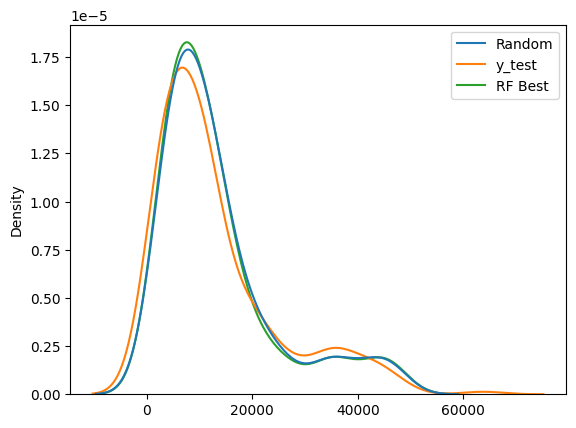

In [88]:
# Para mejorar la visualización eliminamos Redes y Vectores
# Aparentemente parece que el RF Best no mejora
sns.kdeplot(df_y[['Random','y_test','RF Best']])

In [91]:
#Volvemos a calcular las métricas del modelos para ver si es mejor
metrics.append({
        'Modelo': 'RF Best',
        'MSE':mean_squared_error(y_test, df_y['RF Best']),
        'R^2': r2_score(y_test, df_y['RF Best'])
 })
df_metrics=pd.DataFrame(metrics)
df_metrics

,Modelo,MSE,R^2
0,Regresor Lineal,3.170844e+07,0.766022
1,Polinomial,1.983234e+07,0.853656
2,Lasso,3.170608e+07,0.766039
3,Ridge,3.166694e+07,0.766328
4,Arbol,4.093543e+07,0.697936
5,Random,1.936231e+07,0.857125
6,KNN,2.529532e+07,0.813345
7,Vectores,1.489485e+08,-0.099098
8,Redes,2.780232e+08,-1.051546
9,RF Best,2.780232e+08,-1.051546


In [ ]:
#Podemos hacer una validación cruzada (Cross Validation) de modelos >> K-fold
